In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
# Read the data from txt file
with open('../Data/email-Eu-core-department-labels.txt') as f:
    department_labels = f.readlines()
with open('../Data/email-Eu-core.txt') as f:
    core_data = f.readlines()

# strip and split the data
department_labels = [x.strip().split() for x in department_labels]
core_data = [x.strip().split() for x in core_data]

In [5]:
# make graph treating each entry in core_data as an edge
num_nodes = len(set([x[0] for x in core_data] + [x[1] for x in core_data]))

adjacency_matrix = np.zeros((num_nodes, num_nodes))
for edge in core_data:
    adjacency_matrix[int(edge[0]), int(edge[1])] = 1

# create adjacency list from core_data
adjacency_list = [[] for i in range(num_nodes)]
for edge in core_data:
    adjacency_list[int(edge[0])].append(int(edge[1]))

#### 1. Page Rank Score for Each Node

In [7]:
page_rank_scores = nx.pagerank(nx.from_numpy_matrix(adjacency_matrix))

(array([146., 108.,  65.,  52.,  48.,  56.,  51.,  62.,  43.,  46.,  33.,
         26.,  30.,  32.,  23.,  14.,  14.,  16.,  12.,  15.,   6.,  13.,
          6.,   8.,   9.,   6.,   5.,   3.,   4.,   4.,   5.,   0.,   2.,
          6.,   2.,   3.,   3.,   7.,   2.,   1.,   1.,   0.,   0.,   2.,
          0.,   2.,   1.,   1.,   1.,   3.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   1.,   0.,   1.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([0.00017081, 0.00025981, 0.00034881, 0.00043782, 0.00052682,
        0.00061582, 0.00070482, 0.00079382, 0.00088282, 0.00097182,
        0.00106083, 0.00114983, 0.00123883, 0.00132783, 0.00141683,
        0.00150583, 0.00159483, 0.00168384, 0.00177284, 0.00186184,
        0.00195084, 0.00203984, 0.00212884, 0.

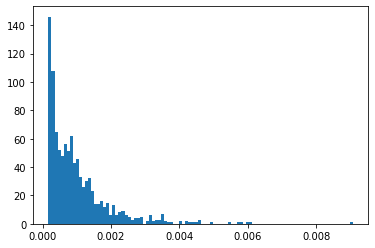

In [8]:
# plot the histogram of page rank scores
plt.hist(page_rank_scores.values(), bins=100)

#### 2. Authority and Hub Score

In [12]:
hubs, authorities = nx.hits(nx.from_numpy_matrix(adjacency_matrix))

(array([171.,  89.,  69.,  55.,  50.,  51.,  42.,  41.,  29.,  23.,  28.,
         30.,  18.,  26.,  19.,  19.,  12.,  16.,  10.,  11.,  12.,  18.,
         12.,   8.,   7.,   5.,   9.,   4.,   6.,   3.,  11.,   6.,   2.,
          8.,   5.,   2.,   6.,   5.,   3.,   3.,   5.,   2.,   2.,   3.,
          2.,   2.,   2.,   3.,   0.,   1.,   1.,   5.,   0.,   3.,   1.,
          2.,   0.,   2.,   1.,   3.,   2.,   3.,   1.,   3.,   0.,   2.,
          1.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([-5.82397136e-23,  8.37024819e-05,  1.67404964e-04,  2.51107446e-04,
         3.34809928e-04,  4.18512409e-04,  5.02214891e-04,  5.85917373e-04,
         6.69619855e-04,  7.53322337e-04,  8.37024819e-04,  9.20727301e-04,
         1.00442978e-03,  1.08813226e-03,  1.17183475e-03,  1.25553723e-03,
         1.339

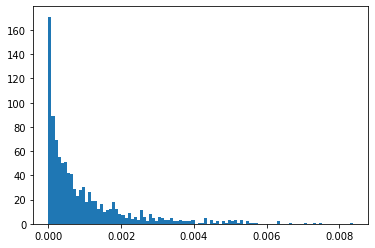

In [13]:
# plot the histogram of hub scores
plt.hist(hubs.values(), bins=100)

(array([171.,  89.,  69.,  55.,  50.,  51.,  42.,  41.,  29.,  23.,  28.,
         30.,  18.,  26.,  19.,  19.,  12.,  16.,  10.,  11.,  12.,  18.,
         12.,   8.,   7.,   5.,   9.,   4.,   6.,   3.,  11.,   6.,   2.,
          8.,   5.,   2.,   6.,   5.,   3.,   3.,   5.,   2.,   2.,   3.,
          2.,   2.,   2.,   3.,   0.,   1.,   1.,   5.,   0.,   3.,   1.,
          2.,   0.,   2.,   1.,   3.,   2.,   3.,   1.,   3.,   0.,   2.,
          1.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([-4.49446133e-21,  8.37024819e-05,  1.67404964e-04,  2.51107446e-04,
         3.34809928e-04,  4.18512409e-04,  5.02214891e-04,  5.85917373e-04,
         6.69619855e-04,  7.53322337e-04,  8.37024819e-04,  9.20727301e-04,
         1.00442978e-03,  1.08813226e-03,  1.17183475e-03,  1.25553723e-03,
         1.339

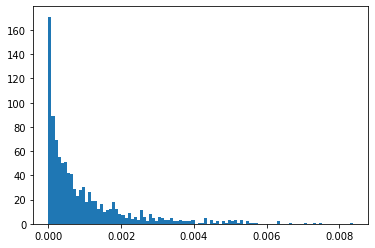

In [14]:
# plot the histogram of authority scores
plt.hist(authorities.values(), bins=100)

#### Page Rank Score vs Authority and Hub Score

In [15]:
difference_page_rank_hubs = [page_rank_scores[i] - hubs[i] for i in range(num_nodes)]
difference_page_rank_authorities = [page_rank_scores[i] - authorities[i] for i in range(num_nodes)]

(array([  1.,   1.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   2.,   2.,
          2.,   2.,   1.,   2.,   2.,   1.,   3.,   2.,   3.,   2.,   1.,
          5.,   2.,   5.,   4.,   2.,   3.,   4.,   5.,   6.,   4.,   2.,
          4.,   7.,   5.,   5.,   3.,   8.,   6.,  11.,   6.,  11.,   9.,
         12.,  12.,   6.,  13.,   9.,  12.,  21.,  20.,  24.,  21.,  21.,
         29.,  52.,  65.,  96., 109.,  75.,  59.,  39.,  30.,  25.,  12.,
         16.,  11.,  10.,  11.,   2.,   4.,   5.,   1.,   4.,   1.,   4.,
          2.,   0.,   3.,  19.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          2.]),
 array([-2.21561578e-03, -2.17549172e-03, -2.13536766e-03, -2.09524360e-03,
        -2.05511954e-03, -2.01499548e-03, -1.97487142e-03, -1.93474737e-03,
        -1.89462331e-03, -1.85449925e-03, -1.81437519e-03, -1.77425113e-03,
        -1.73412707e-03, -1.69400301e-03, -1.65387895e-03, -1.61375489e-03,
        -1.573

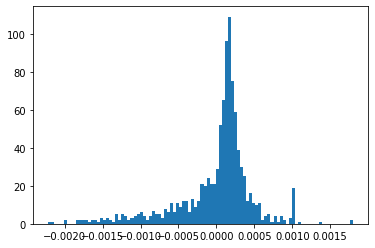

In [16]:
# plot the histogram of difference between page rank and hub scores
plt.hist(difference_page_rank_hubs, bins=100)

(array([  1.,   1.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   2.,   2.,
          2.,   2.,   1.,   2.,   2.,   1.,   3.,   2.,   3.,   2.,   1.,
          5.,   2.,   5.,   4.,   2.,   3.,   4.,   5.,   6.,   4.,   2.,
          4.,   7.,   5.,   5.,   3.,   8.,   6.,  11.,   6.,  11.,   9.,
         12.,  12.,   6.,  13.,   9.,  12.,  21.,  20.,  24.,  21.,  21.,
         29.,  52.,  65.,  96., 109.,  75.,  59.,  39.,  30.,  25.,  12.,
         16.,  11.,  10.,  11.,   2.,   4.,   5.,   1.,   4.,   1.,   4.,
          2.,   0.,   3.,  19.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          2.]),
 array([-2.21561578e-03, -2.17549172e-03, -2.13536766e-03, -2.09524360e-03,
        -2.05511954e-03, -2.01499548e-03, -1.97487142e-03, -1.93474737e-03,
        -1.89462331e-03, -1.85449925e-03, -1.81437519e-03, -1.77425113e-03,
        -1.73412707e-03, -1.69400301e-03, -1.65387895e-03, -1.61375489e-03,
        -1.573

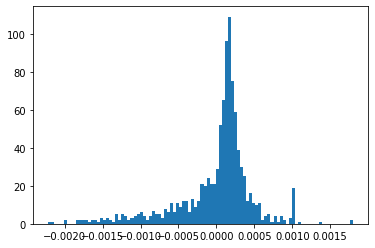

In [17]:
# plot the histogram of difference between page rank and authority scores
plt.hist(difference_page_rank_authorities, bins=100)